In [ ]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
new_columns=["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [5]:
df.columns=new_columns

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape,df.info

((303, 14),
 <bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
 0     63    1   3     145   233    1         0      150      0      2.3   
 1     37    1   2     130   250    0         1      187      0      3.5   
 2     41    0   1     130   204    0         0      172      0      1.4   
 3     56    1   1     120   236    0         1      178      0      0.8   
 4     57    0   0     120   354    0         1      163      1      0.6   
 ..   ...  ...  ..     ...   ...  ...       ...      ...    ...      ...   
 298   57    0   0     140   241    0         1      123      1      0.2   
 299   45    1   3     110   264    0         1      132      0      1.2   
 300   68    1   0     144   193    1         1      141      0      3.4   
 301   57    1   0     130   131    0         1      115      1      1.2   
 302   57    0   1     130   236    0         0      174      0      0.0   
 
      slope  ca  thal  target  
 0        

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
isnull_number=[]
for i in df.columns:
    x=df[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number,index=df.columns,columns=["Total missing values"])


,Total missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


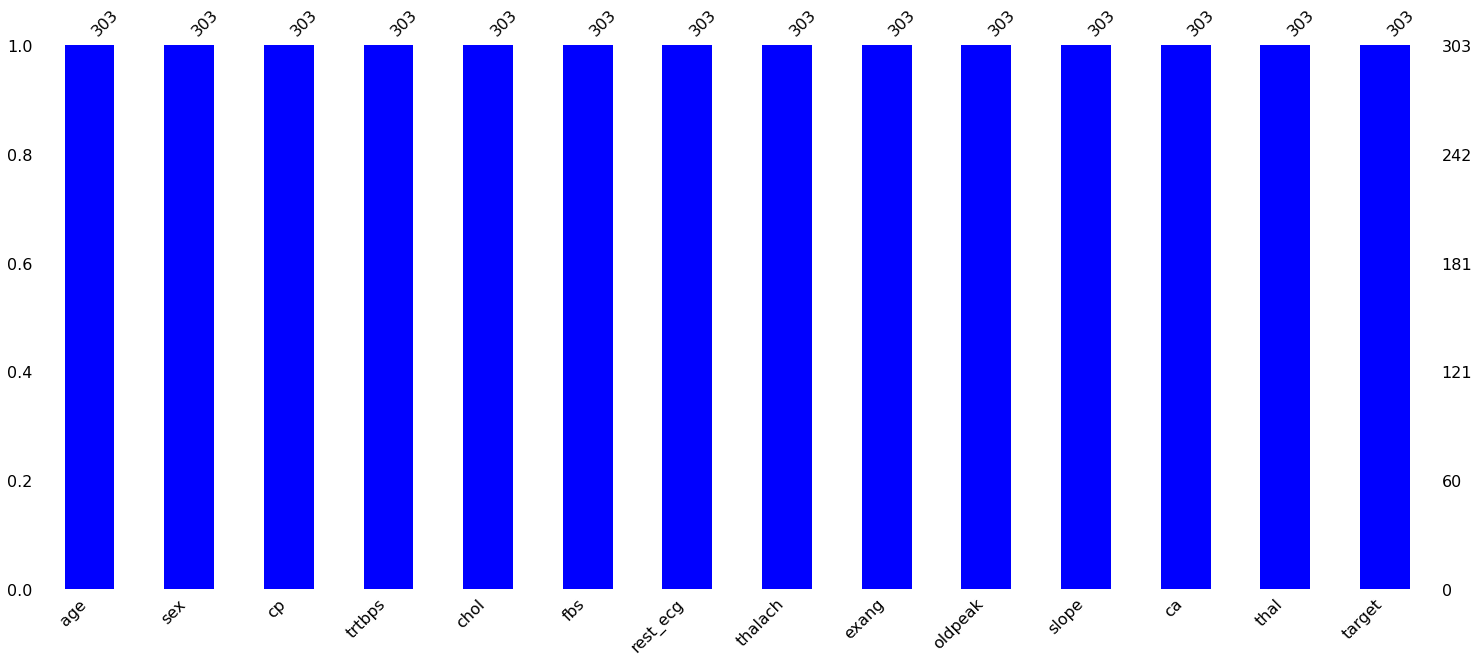

In [10]:
import missingno
missingno.bar(df,color="b")

In [11]:
unique_number=[]
for i in df.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number,index=df.columns,columns=["Total unique values"])

,Total unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [12]:
numeric_var =["age","trtbps","chol","thalach","oldpeak"]
categoric_var=["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [13]:
df[numeric_var].describe(),df[categoric_var].describe()

(              age      trtbps        chol     thalach     oldpeak
 count  303.000000  303.000000  303.000000  303.000000  303.000000
 mean    54.366337  131.623762  246.264026  149.646865    1.039604
 std      9.082101   17.538143   51.830751   22.905161    1.161075
 min     29.000000   94.000000  126.000000   71.000000    0.000000
 25%     47.500000  120.000000  211.000000  133.500000    0.000000
 50%     55.000000  130.000000  240.000000  153.000000    0.800000
 75%     61.000000  140.000000  274.500000  166.000000    1.600000
 max     77.000000  200.000000  564.000000  202.000000    6.200000,
               sex          cp         fbs    rest_ecg       exang       slope  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.683168    0.966997    0.148515    0.528053    0.326733    1.399340   
 std      0.466011    1.032052    0.356198    0.525860    0.469794    0.616226   
 min      0.000000    0.000000    0.000000    0.000000    0.000000  

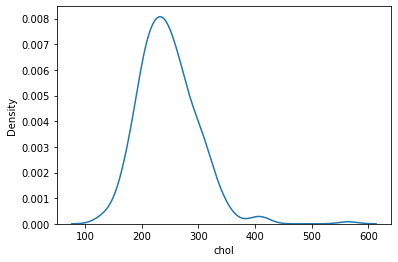

In [14]:
sns.distplot(df["chol"],hist=False)

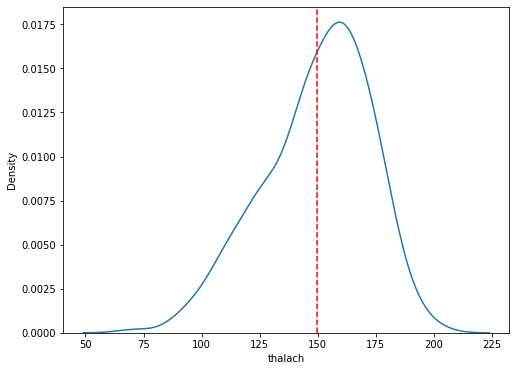

In [15]:
x,y=plt.subplots(figsize=(8,6))
sns.distplot(df["thalach"],hist=False,ax=y)
y.axvline(df["thalach"].mean(),color="r",ls="--")

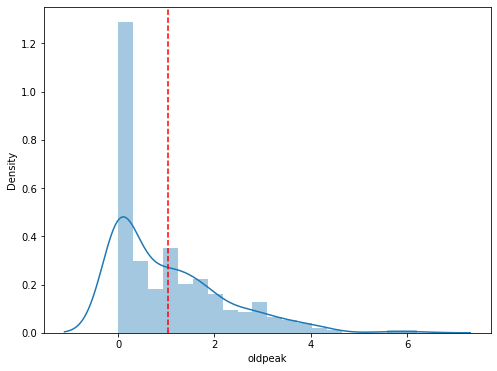

In [16]:
x,y=plt.subplots(figsize=(8,6))
sns.distplot(df["oldpeak"],bins=20,ax=y)
y.axvline(df["oldpeak"].mean(),color="r",ls="--")

In [17]:
numeric_axis=["Age of the Patient","Resting Blood Pressure","Cholestrol","Maximum Heart Rate Acheived","ST Depression"]


In [18]:
list(zip(numeric_var,numeric_axis))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholestrol'),
 ('thalach', 'Maximum Heart Rate Acheived'),
 ('oldpeak', 'ST Depression')]

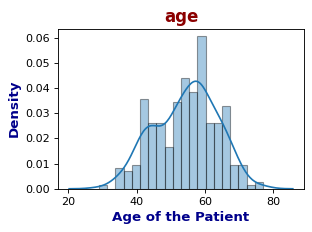

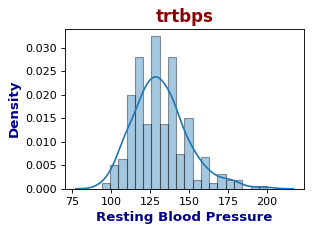

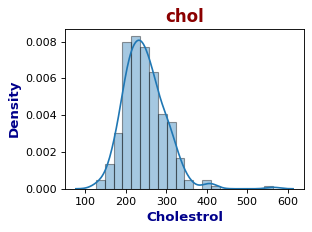

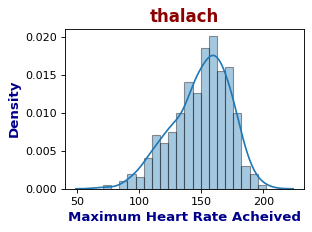

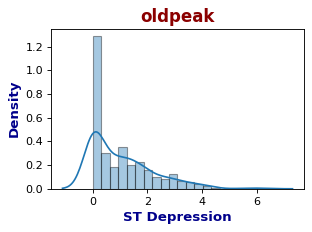

In [19]:
title_font={"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font={"family":"arial","color":"darkblue","weight":"bold","size":12}

for i,z in list(zip(numeric_var,numeric_axis)):
    plt.figure(figsize=(4,3),dpi=80)
    sns.distplot(df[i],hist_kws=dict(linewidth=1,edgecolor="k"),bins=20)
    plt.title(i,fontdict=title_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel("Density",fontdict=axis_font)
    plt.tight_layout()
    plt.show()

In [20]:
categoric_axis=["Gender","Chest Pain Type","Fasting Blood Sugar","Resting Electrocardiographic results","Exercise Induced Angine","The slope of ST Segment","Number of Major vessels","Thal","Target"]

In [21]:
list(zip(categoric_var,categoric_axis))
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

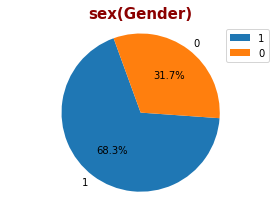

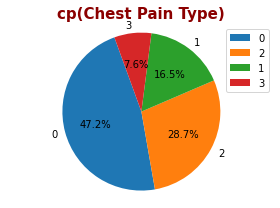

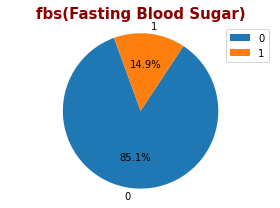

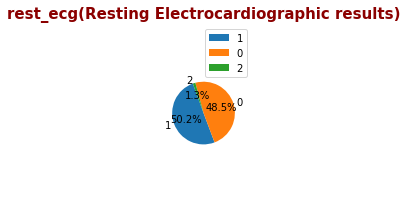

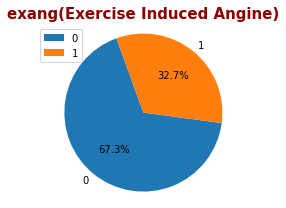

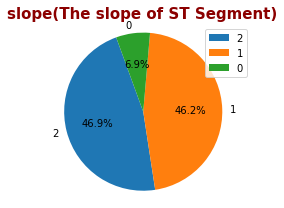

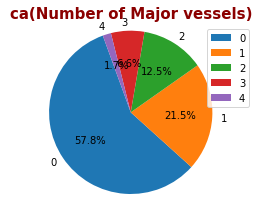

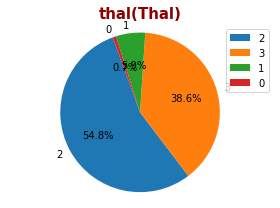

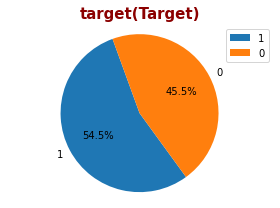

In [22]:
title_font={"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font={"family":"arial","color":"darkblue","weight":"bold","size":12}

for i,z in list(zip(categoric_var,categoric_axis)):
    fig,ax=plt.subplots(figsize=(4,3))
    observation_values=list(df[i].value_counts().index)
    total_observation_values=list(df[i].value_counts())
    ax.pie(total_observation_values,labels=observation_values,autopct="%1.1f%%",startangle=110,labeldistance=1.1)
    ax.axis("equal")
    plt.title(i+"("+z+")",fontdict=title_font)
    plt.tight_layout()
    plt.legend()
    plt.show()
    

In [23]:
df[df["thal"]==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [24]:
df["thal"].replace(0,np.nan,inplace=True)

In [25]:
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [26]:
isnull_number=[]
for i in df.columns:
    x=df[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number,index=df.columns,columns=["Total missing values"])

,Total missing values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [27]:
df["thal"].fillna(2,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


In [32]:
df["oldpeak"]=pd.to_numeric(df["oldpeak"],downcast="integer")
df["thal"]=pd.to_numeric(df["thal"],downcast="integer")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int8   
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), int8(1)
memory usage: 31.2 KB


In [34]:
df["oldpeak"]=pd.to_numeric(df["oldpeak"],downcast="integer")

In [36]:
print(df["thal"].value_counts())
numeric_var.append("target")

2    168
3    117
1     18
Name: thal, dtype: int64


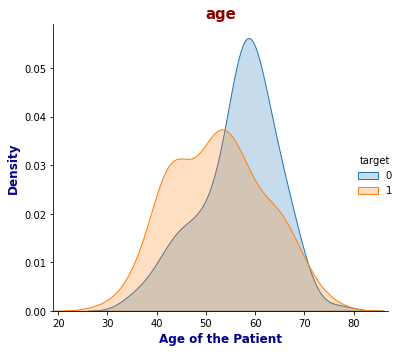

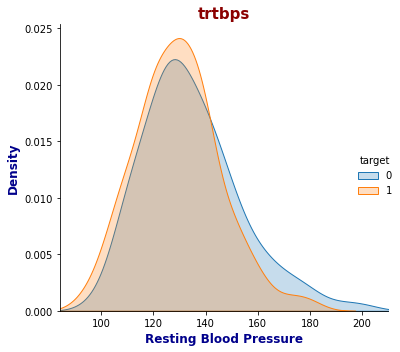

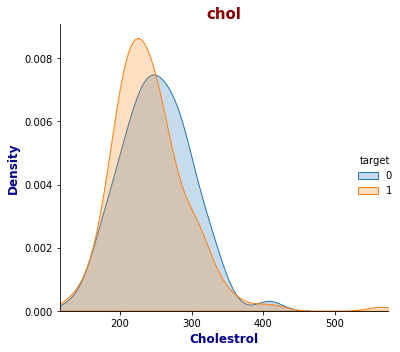

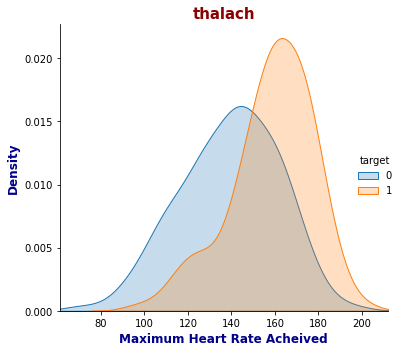

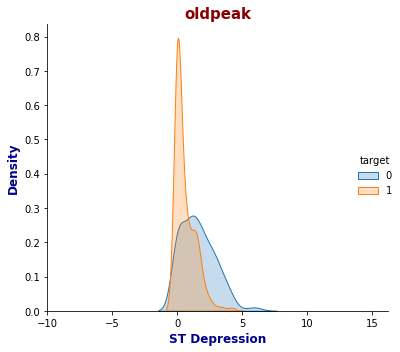

In [37]:
title_font={"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font={"family":"arial","color":"darkblue","weight":"bold","size":12}

for i,z in list(zip(numeric_var,numeric_axis)):
    graph=sns.FacetGrid(df[numeric_var],hue="target",height=5,xlim=((df[i].min()-10),(df[i].max()+10)))
    graph.map(sns.kdeplot,i,shade=True)
    graph.add_legend()
    plt.title(i,fontdict=title_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel("Density",fontdict=axis_font)
    plt.tight_layout()
    plt.show()

In [40]:
df[numeric_var].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


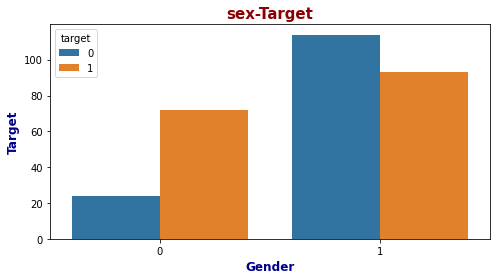

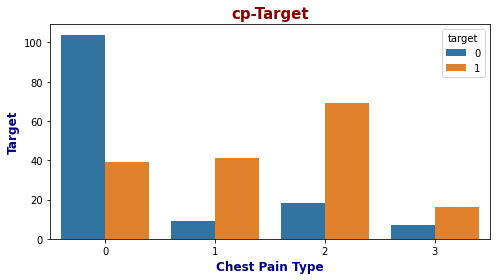

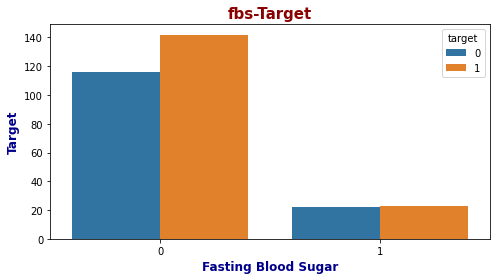

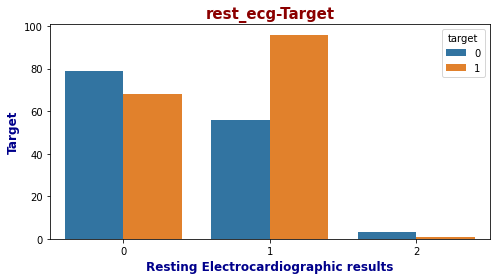

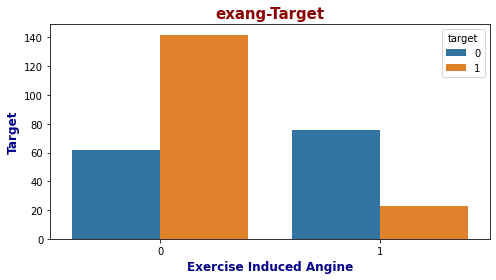

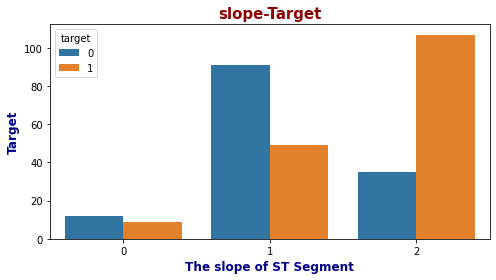

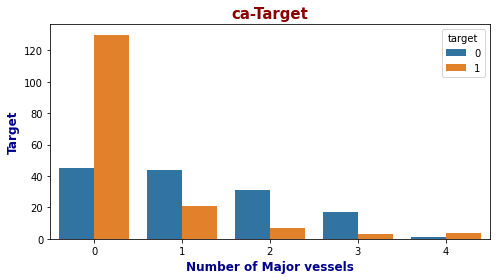

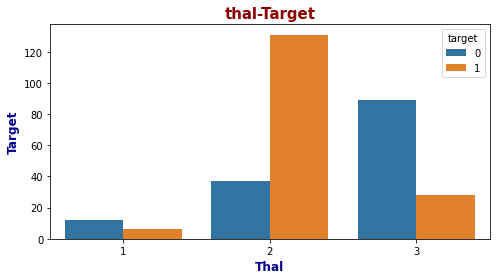

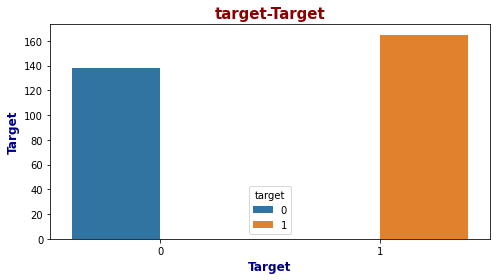

In [43]:
title_font={"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font={"family":"arial","color":"darkblue","weight":"bold","size":12}

for i,z in list(zip(categoric_var,categoric_axis)):
    plt.figure(figsize=(7,4))
    graph=sns.countplot(i,data=df[categoric_var],hue="target")
    #graph.add_legend()
    plt.title(i+"-Target",fontdict=title_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel("Target",fontdict=axis_font)
    plt.tight_layout()
    plt.show()

In [44]:
df[categoric_var].corr().iloc[:,[-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


In [45]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


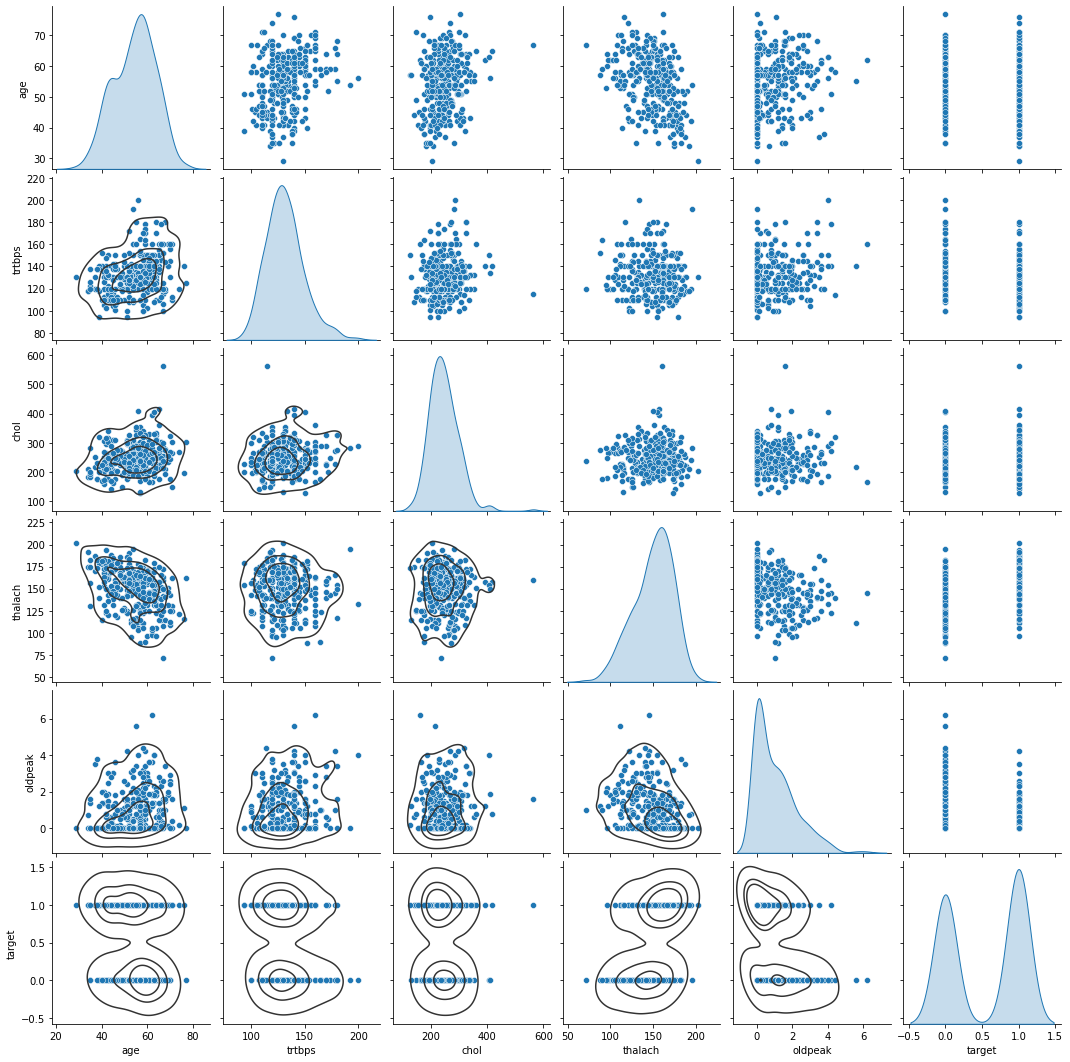

In [46]:
graph=sns.pairplot(df[numeric_var],diag_kind='kde')
graph.map_lower(sns.kdeplot,levels=4,color='.2')
plt.show()

In [50]:
numeric_var.remove("target")
from sklearn.preprocessing import RobustScaler
robust_scaler=RobustScaler()
scaled_data=robust_scaler.fit_transform(df[numeric_var])

In [51]:
scaled_data.shape

(303, 5)

In [53]:
df_scaled=pd.DataFrame(scaled_data,columns=numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [54]:
df_new=pd.concat([df_scaled,df.loc[:,'target']],axis=1)
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [55]:
melted_data=pd.melt(df_new,id_vars="target",var_name="variables",value_name="value")
melted_data,numeric_var

(      target variables     value
 0          1       age  0.592593
 1          1       age -1.333333
 2          1       age -1.037037
 3          1       age  0.074074
 4          1       age  0.148148
 ...      ...       ...       ...
 1510       0   oldpeak -0.375000
 1511       0   oldpeak  0.250000
 1512       0   oldpeak  1.625000
 1513       0   oldpeak  0.250000
 1514       0   oldpeak -0.500000
 
 [1515 rows x 3 columns], ['age', 'trtbps', 'chol', 'thalach', 'oldpeak'])

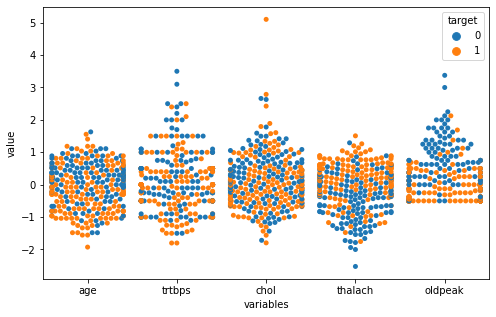

In [56]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="variables",y="value",hue="target",data=melted_data)
plt.show()

In [57]:
df_new=pd.concat([df_scaled,df.loc[:,"target"]],axis=1)
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


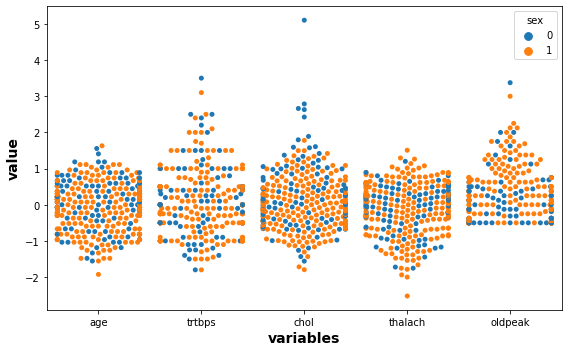

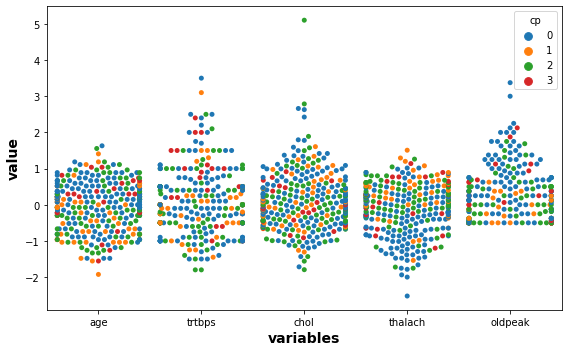

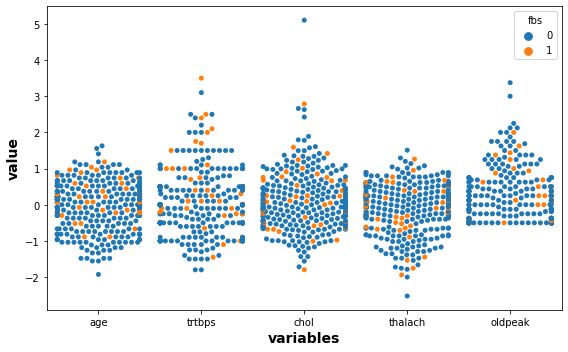

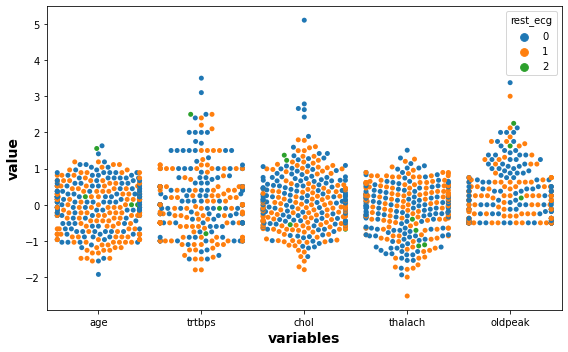

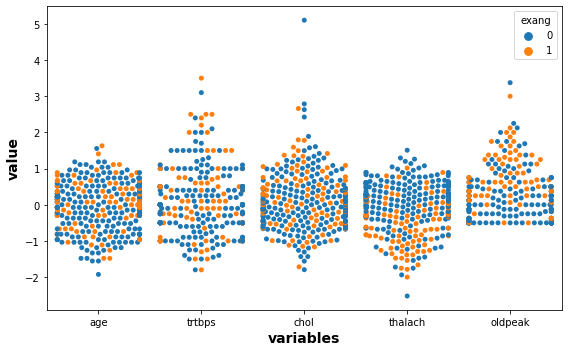

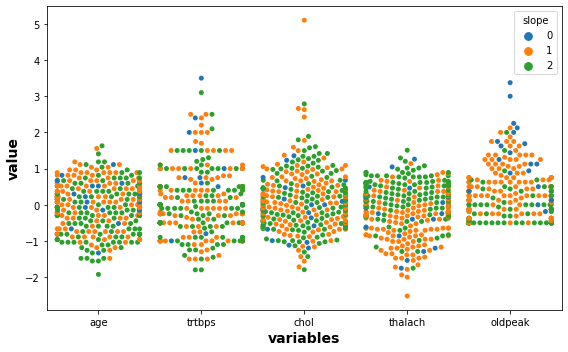

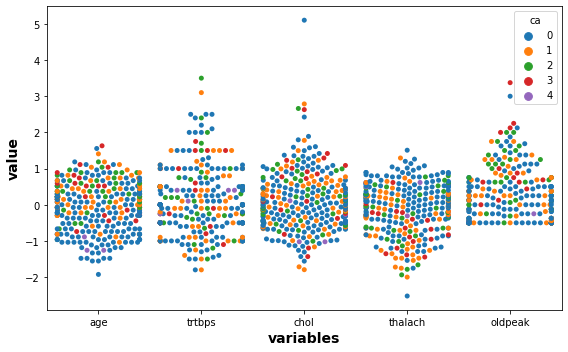

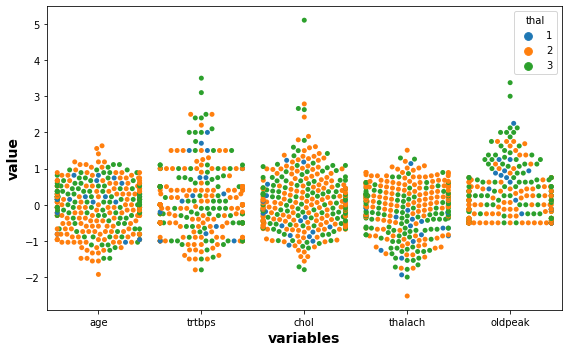

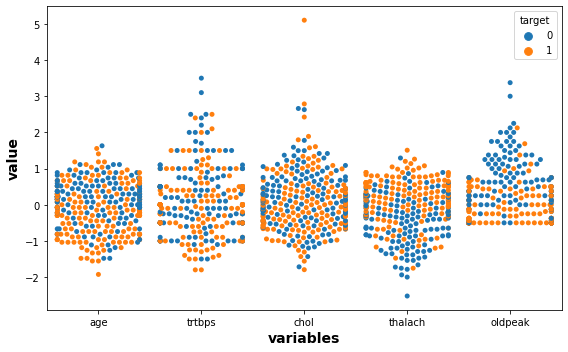

In [58]:
axis_font={"family":"arial","color":"black","weight":"bold","size":14}

for i in df[categoric_var]:
    df_new=pd.concat([df_scaled,df.loc[:,i]],axis=1)
    melted_data=pd.melt(df_new,id_vars=i,var_name="variables",value_name="value")
    plt.figure(figsize=(8,5))
    sns.swarmplot(x="variables",y="value",hue=i,data=melted_data)
    plt.xlabel("variables",fontdict=axis_font)
    plt.ylabel("value",fontdict=axis_font)
    plt.tight_layout()
    plt.show()

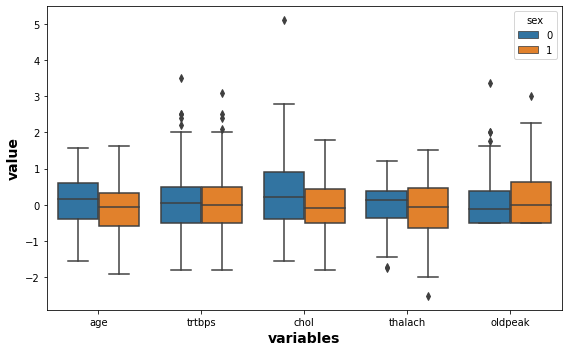

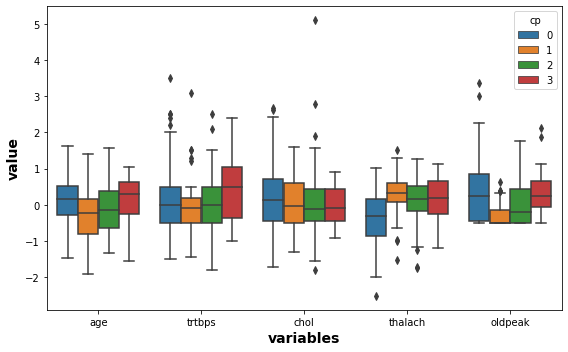

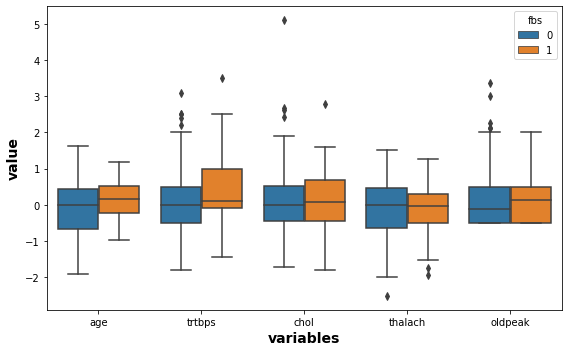

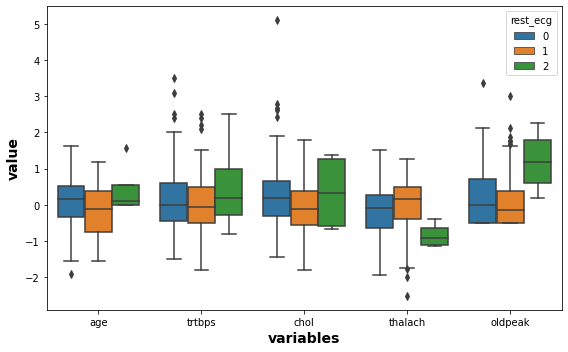

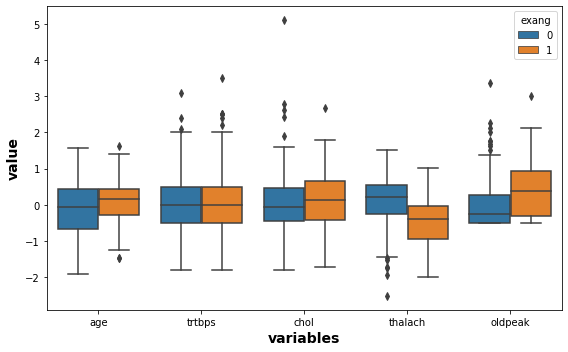

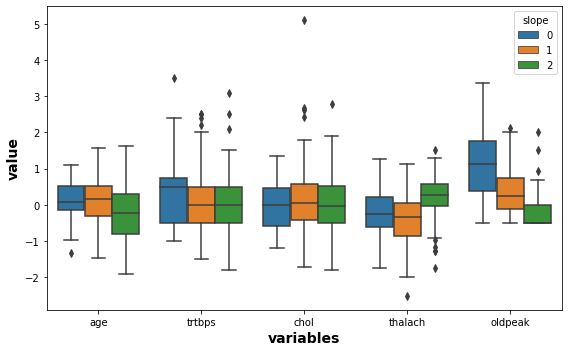

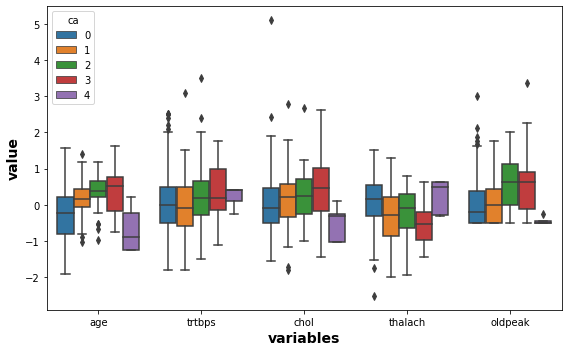

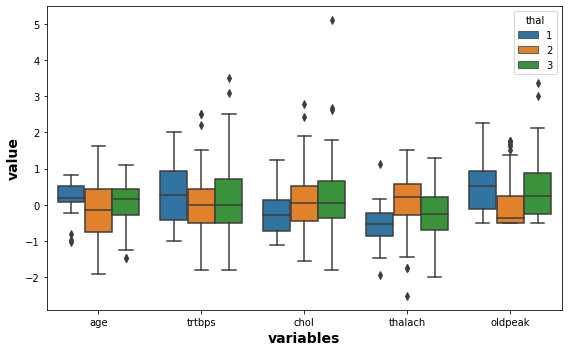

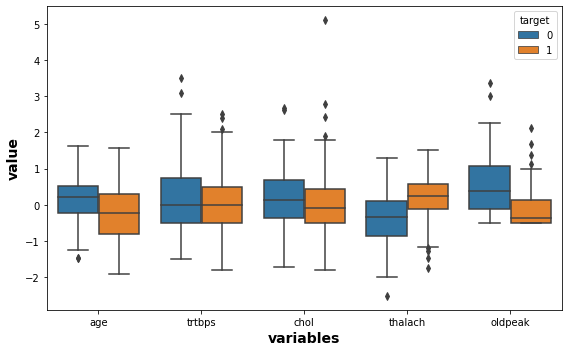

In [59]:
axis_font={"family":"arial","color":"black","weight":"bold","size":14}

for i in df[categoric_var]:
    df_new=pd.concat([df_scaled,df.loc[:,i]],axis=1)
    melted_data=pd.melt(df_new,id_vars=i,var_name="variables",value_name="value")
    plt.figure(figsize=(8,5))
    sns.boxplot(x="variables",y="value",hue=i,data=melted_data)
    plt.xlabel("variables",fontdict=axis_font)
    plt.ylabel("value",fontdict=axis_font)
    plt.tight_layout()
    plt.show()

In [60]:
df_new2=pd.concat((df_scaled,df[categoric_var]),axis=1)

In [61]:
df_new2.head()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1


In [62]:
df_new2.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


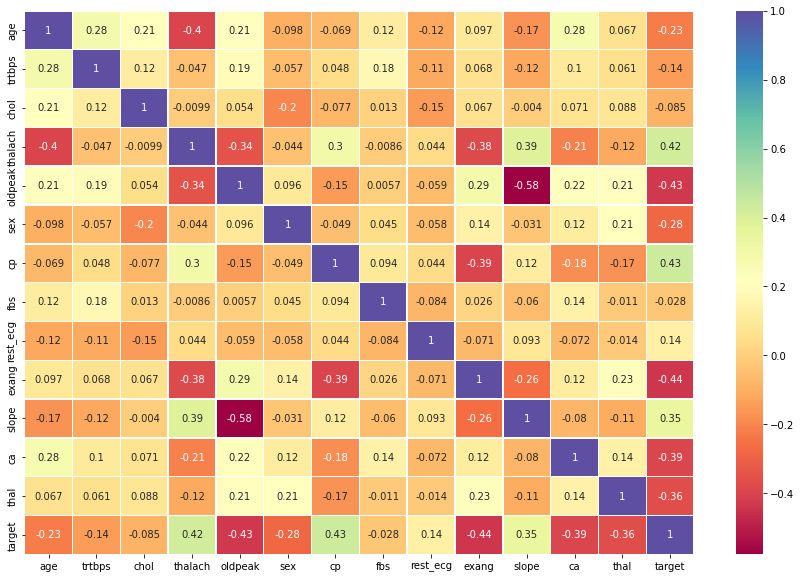

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_new2.corr(),cmap="Spectral",annot=True,linewidths=0.5)

In [64]:
df.drop(["chol","fbs","rest_ecg"],axis=1,inplace=True)

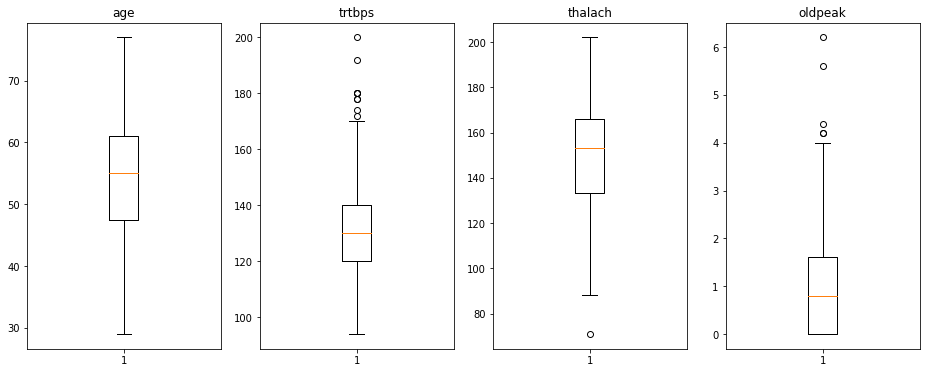

In [65]:
fig,ax=plt.subplots(1,4,figsize=(16,6))
ax[0].boxplot(df["age"])
ax[0].set_title("age")
ax[1].boxplot(df["trtbps"])
ax[1].set_title("trtbps")
ax[2].boxplot(df["thalach"])
ax[2].set_title("thalach")
ax[3].boxplot(df["oldpeak"])
ax[3].set_title("oldpeak")
plt.show()

In [66]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [67]:
zscores_trtbps=zscore(df["trtbps"])
for threshold in range(1,4):
    print("Threshold {}".format(threshold))
    print("Number of Outliers {}".format(len(np.where(zscores_trtbps>threshold)[0])))
    

Threshold 1
Number of Outliers 51
Threshold 2
Number of Outliers 13
Threshold 3
Number of Outliers 2


In [68]:
df[zscores_trtbps > 2].trtbps.min()

170

In [69]:
df[df['trtbps']<170].trtbps.max()

165

In [70]:
winsorize_percentile_trtbps=stats.percentileofscore(df["trtbps"],165)/100
winsorize_percentile_trtbps,1-winsorize_percentile_trtbps

(0.957095709570957, 0.04290429042904298)

In [71]:
trtbps_winsorize=winsorize(df.trtbps,(0,(1-winsorize_percentile_trtbps)))
trtbps_winsorize

masked_array(data=[145, 130, 130, 120, 120, 140, 140, 120, 165, 150, 140,
                   130, 130, 110, 150, 120, 120, 150, 150, 140, 135, 130,
                   140, 150, 140, 160, 150, 110, 140, 130, 105, 120, 130,
                   125, 125, 142, 135, 150, 155, 160, 140, 130, 104, 130,
                   140, 120, 140, 138, 128, 138, 130, 120, 130, 108, 135,
                   134, 122, 115, 118, 128, 110, 108, 118, 135, 140, 138,
                   100, 130, 120, 124, 120,  94, 130, 140, 122, 135, 125,
                   140, 128, 105, 112, 128, 102, 152, 102, 115, 118, 101,
                   110, 100, 124, 132, 138, 132, 112, 142, 140, 108, 130,
                   130, 148, 165, 140, 120, 129, 120, 160, 138, 120, 110,
                   165, 150, 140, 110, 130, 120, 130, 120, 105, 138, 130,
                   138, 112, 108,  94, 118, 112, 152, 136, 120, 160, 134,
                   120, 110, 126, 130, 120, 128, 110, 128, 120, 115, 120,
                   106, 140, 156, 118,

Text(0.5, 0, 'trtbps_winsorize')

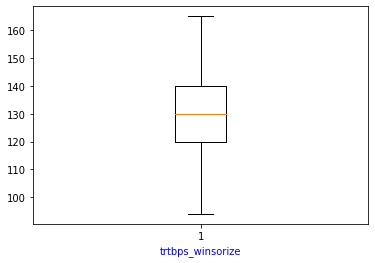

In [72]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize",color="b")

In [73]:
df["trtbps_winsorize"]=trtbps_winsorize

In [74]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


In [77]:
def iqr(df,var):
    q1=np.quantile(df[var],0.25)
    q3=np.quantile(df[var],0.75)
    diff=q3-q1
    lower_v=q1-(1.5*diff)
    upper_v=q3+(1.5*diff)
    return df[(df[var]<lower_v) | (df[var] > upper_v)]

In [78]:
thalach_out=iqr(df,"thalach")
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [79]:
df.drop([272],axis=0,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbfb040f250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbfb040f910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbfb06c6eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbfb040ffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbfb040b5b0>],
 'means': []}

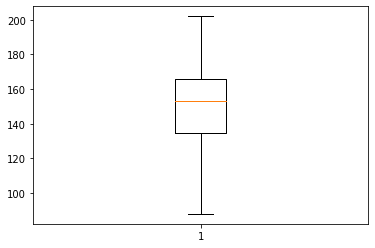

In [80]:
plt.boxplot(df["thalach"])

In [81]:
oldpeak_out=iqr(df,"oldpeak")
oldpeak_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [82]:
df[df["oldpeak"]<4.2].oldpeak.max()

4.0

In [83]:
winsorize_percentile_oldpeak=stats.percentileofscore(df["oldpeak"],4)/100
winsorize_percentile_oldpeak,1-winsorize_percentile_oldpeak

(0.9801324503311258, 0.019867549668874163)

In [84]:
oldpeak_winsorize=winsorize(df.oldpeak,(0,1-winsorize_percentile_oldpeak))
oldpeak_winsorize

masked_array(data=[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2,
                   0.2, 0.6, 1.8, 1. , 1.6, 0. , 2.6, 1.5, 1.8, 0.5, 0.4,
                   0. , 1. , 1.4, 0.4, 1.6, 0.6, 0.8, 1.2, 0. , 0.4, 0. ,
                   0.5, 1.4, 1.4, 0. , 1.6, 0.8, 0.8, 1.5, 0.2, 3. , 0.4,
                   0. , 0.2, 0. , 0. , 0. , 0. , 0.5, 0.4, 1.8, 0.6, 0. ,
                   0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1.4,
                   1.2, 0.6, 0. , 0. , 0.4, 0. , 0. , 0. , 0.2, 1.4, 2.4,
                   0. , 0. , 0.6, 0. , 0. , 0. , 1.2, 0.6, 1.6, 1. , 0. ,
                   1.6, 1. , 0. , 0. , 0. , 0. , 0. , 0. , 1.2, 0.1, 1.9,
                   0. , 0.8, 4. , 0. , 0.8, 0. , 1.5, 0.1, 0.2, 1.1, 0. ,
                   0. , 0.2, 0.2, 0. , 0. , 0. , 2. , 1.9, 0. , 0. , 2. ,
                   0. , 0. , 0. , 0. , 0.7, 0.1, 0. , 0.1, 0.2, 0. , 0. ,
                   0. , 0. , 0. , 0. , 0. , 0. , 1.5, 0.2, 0.6, 1.2, 0. ,
                   0.3, 1.1, 0. , 0.3,

Text(0.5, 0, 'oldpeak_winsorize')

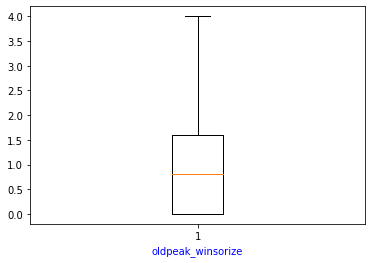

In [85]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize",color="blue")

In [86]:
df["oldpeak_winsorize"]=oldpeak_winsorize

In [87]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [88]:
df.drop(['trtbps','oldpeak'],axis=1,inplace=True)

In [90]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


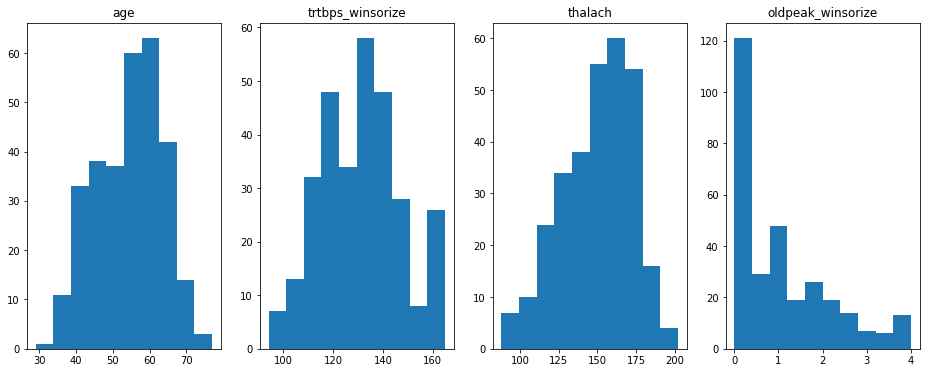

In [89]:
fig,ax=plt.subplots(1,4,figsize=(16,6))
ax[0].hist(df["age"])
ax[0].set_title("age")
ax[1].hist(df["trtbps_winsorize"])
ax[1].set_title("trtbps_winsorize")
ax[2].hist(df["thalach"])
ax[2].set_title("thalach")
ax[3].hist(df["oldpeak_winsorize"])
ax[3].set_title("oldpeak_winsorize")
plt.show()

In [92]:
df[['age','trtbps_winsorize','thalach','oldpeak_winsorize']].agg(['skew']).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


In [93]:
df["oldpeak_winsorize_log"]=np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"]=np.sqrt(df["oldpeak_winsorize"])

In [94]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [95]:
df[['oldpeak_winsorize','oldpeak_winsorize_log','oldpeak_winsorize_sqrt']].agg(['skew']).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [96]:
df.drop(["oldpeak_winsorize","oldpeak_winsorize_log"],axis=1,inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     302 non-null    int64  
 1   sex                     302 non-null    int64  
 2   cp                      302 non-null    int64  
 3   thalach                 302 non-null    int64  
 4   exang                   302 non-null    int64  
 5   slope                   302 non-null    int64  
 6   ca                      302 non-null    int64  
 7   thal                    302 non-null    int8   
 8   target                  302 non-null    int64  
 9   trtbps_winsorize        302 non-null    int64  
 10  oldpeak_winsorize_sqrt  302 non-null    float64
dtypes: float64(1), int64(9), int8(1)
memory usage: 26.2 KB


In [98]:
df_copy=df.copy()

In [99]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [100]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [101]:
df_copy=pd.get_dummies(df_copy,columns=categoric_var[:-1],drop_first=True)

In [102]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0


In [103]:
new_numeric_var=["age","thalach","trtbps_winsorize","oldpeak_winsorize_sqrt"]

In [104]:
robust_scalar=RobustScaler()

In [105]:
df_copy[new_numeric_var]=robust_scalar.fit_transform(df_copy[new_numeric_var])

In [106]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.309091,1.079365,1,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,1,0
2,-1.018182,0.603175,1,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.072727,0.793651,1,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,1,0
4,0.145455,0.317460,1,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,1,0


In [107]:
from sklearn.model_selection import train_test_split
X=df_copy.drop(["target"],axis=1)
y=df_copy[["target"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=3)

In [108]:
len(X_train),len(X_test),len(y_train),len(y_test)

(271, 31, 271, 31)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [110]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [111]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Test accuracy is {accuracy}")

Test accuracy is 0.8709677419354839


In [112]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(log_reg,X_test,y_test,cv=10)
scores.mean()

0.8666666666666666

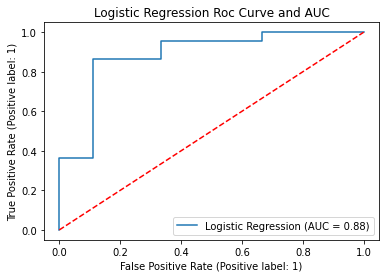

In [113]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg,X_test,y_test,name="Logistic Regression")
plt.title("Logistic Regression Roc Curve and AUC")
plt.plot([0,1],[0,1],"r--")

In [114]:
from sklearn.model_selection import GridSearchCV
log_reg_new=LogisticRegression()
log_reg_new

LogisticRegression()

In [115]:
parameters={"penalty":["l1","l2"],"solver":["newton-cg","lbfgs","liblinear","sag","saga"]}

In [116]:
log_reg_grid=GridSearchCV(log_reg_new,param_grid=parameters)

In [117]:
log_reg_grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [118]:
log_reg_grid.best_params_

{'penalty': 'l1', 'solver': 'saga'}

In [119]:
log_reg_new2=LogisticRegression(penalty="l1",solver="saga")
log_reg_new2.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='saga')

In [120]:
y_pred=log_reg_new2.predict(X_test)
accuracy_score(y_test,y_pred)

0.8709677419354839

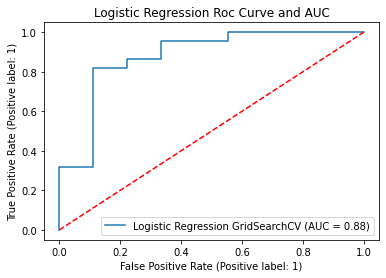

In [121]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg_new2,X_test,y_test,name="Logistic Regression GridSearchCV")
plt.title("Logistic Regression Roc Curve and AUC")
plt.plot([0,1],[0,1],"r--")

In [122]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(random_state=5)
dec_tree.fit(X_train,y_train)
y_pred=dec_tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.8387096774193549

In [123]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dec_tree,X_test,y_test,cv=10)
scores.mean()

0.8333333333333333

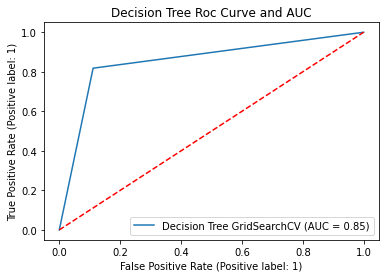

In [124]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dec_tree,X_test,y_test,name="Decision Tree GridSearchCV")
plt.title("Decision Tree Roc Curve and AUC")
plt.plot([0,1],[0,1],"r--")

In [125]:
from sklearn.svm import SVC
svc_model=SVC(random_state=5)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8709677419354839

In [126]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svc_model,X_test,y_test,cv=10)
scores.mean()

0.8333333333333334

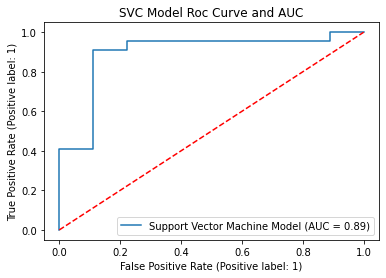

In [127]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc_model,X_test,y_test,name="Support Vector Machine Model")
plt.title("SVC Model Roc Curve and AUC")
plt.plot([0,1],[0,1],"r--")

In [128]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=5)

In [129]:
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)
accuracy_score(y_pred,y_test)

0.8387096774193549

In [130]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(random_forest,X_test,y_test,cv=10)
scores.mean()

0.8999999999999998

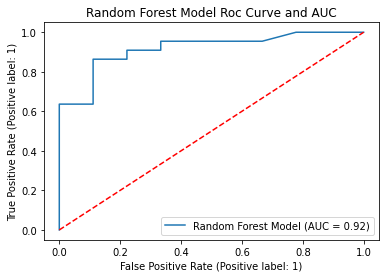

In [131]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(random_forest,X_test,y_test,name="Random Forest Model")
plt.title("Random Forest Model Roc Curve and AUC")
plt.plot([0,1],[0,1],"r--")

In [132]:
from sklearn.model_selection import GridSearchCV
random_forest_new=RandomForestClassifier(random_state=0)
random_forest_new

RandomForestClassifier(random_state=0)

In [133]:
parameters={"n_estimators":[50,100,150,200],"criterion":["gini","entropy"],
           "max_features":["auto","sqrt","log2"],"bootstrap":[True,False]}

In [135]:
random_forest_grid=GridSearchCV(random_forest_new,param_grid=parameters)
random_forest_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [137]:
random_forest_new2=RandomForestClassifier(bootstrap=True,criterion="entropy",max_features="auto",
                                         n_estimators=200,random_state=5)

In [138]:
random_forest_new2.fit(X_train,y_train)
y_pred=random_forest_new2.predict(X_test)
accuracy_score(y_pred,y_test)

0.9032258064516129

In [139]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(random_forest_new2,X_test,y_test,cv=10)
scores.mean()

0.8999999999999998

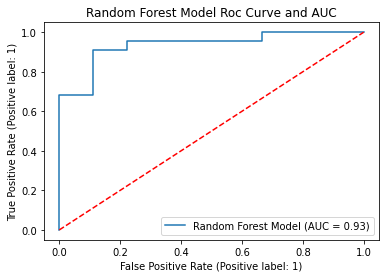

In [140]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(random_forest_new2,X_test,y_test,name="Random Forest Model")
plt.title("Random Forest Model Roc Curve and AUC")
plt.plot([0,1],[0,1],"r--")